<a href="https://colab.research.google.com/github/maninder-bltr/LoginPage/blob/main/HandWrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import time

In [35]:
X, y = datasets.load_digits(return_X_y=True)

# check data shapes - data is already flattened
print("X shape:", X.shape[0:])
print("y shape:", y.shape[0:])

X shape: (1797, 64)
y shape: (1797,)


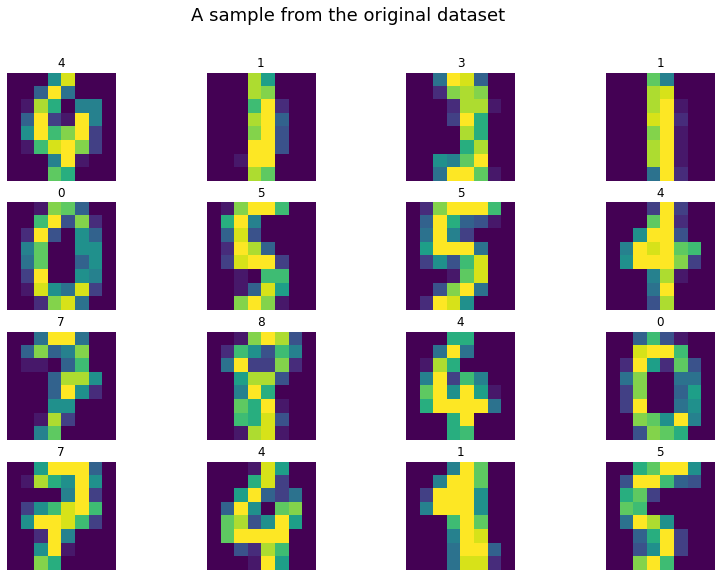

In [36]:
pics_count = 16
digits = np.zeros((pics_count,8,8), dtype=int)
labels = np.zeros((pics_count,1), dtype=int)
for i in range(pics_count):
  idx = randint(0, X.shape[0]-1)
  # as data is flattened we need them to be reshaped to the original 2D shape
  digits[i] = X[idx].reshape(8,8)
  labels[i] = y[idx]

# then we print them all
fig = plt.figure()
fig.suptitle("A sample from the original dataset", fontsize=18)
for n, (digit, label) in enumerate(zip(digits, labels)):
  a = fig.add_subplot(4, 4, n + 1)
  plt.imshow(digit)
  a.set_title(label[0])
  a.axis('off')
fig.set_size_inches(fig.get_size_inches() * pics_count / 7)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
print("X train shape:", X_train.shape[0:])
print("y train shape:", y_train.shape[0:])
print("X test shape:", X_test.shape[0:])
print("y test shape:", y_test.shape[0:])

X train shape: (1257, 64)
y train shape: (1257,)
X test shape: (540, 64)
y test shape: (540,)


In [39]:
def lets_knn(X_train, y_train, X_test, y_test, n_neighbors=3, weights='uniform', print_wrong_pred=False):
    t0 = time.time()
    # creating and training knn classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    t1 = time.time()

    # predicting classes and comparing them with actual labels
    pred = knn.predict(X_test)
    t2 = time.time()
    # calculating accuracy
    accuracy = round(np.mean(pred == y_test)*100, 1)

    print("Accuracy of", weights ,"KNN with", n_neighbors, "neighbors:", accuracy,"%. Fit in",
          round(t1 - t0, 1), "s. Prediction in", round(t2 - t1, 1), "s")

    # selecting wrong predictions with correct and wrong labels
    wrong_pred = X_test[(pred != y_test)]
    correct_labels = y_test[(pred != y_test)]
    wrong_labels = pred[(pred != y_test)]

    if print_wrong_pred:
        # the we print first 16 of them
        fig = plt.figure()
        fig.suptitle("Incorrect predictions", fontsize=18)
        # in order to print different sized photos, we need to determine to what shape we want to reshape
        size = int(np.sqrt(X_train.shape[1]))
        for n, (digit, wrong_label, correct_label) in enumerate(zip(wrong_pred, wrong_labels, correct_labels)):
            a = fig.add_subplot(4, 4, n + 1)
            plt.imshow(digit.reshape(size,size))
            a.set_title("Correct: " + str(correct_label) + ". Predicted: " + str(wrong_label))
            a.axis('off')
            if n == 15:
                break
        fig.set_size_inches(fig.get_size_inches() * pics_count / 7)
        plt.show()

Accuracy of uniform KNN with 5 neighbors: 98.1 %. Fit in 0.0 s. Prediction in 0.1 s


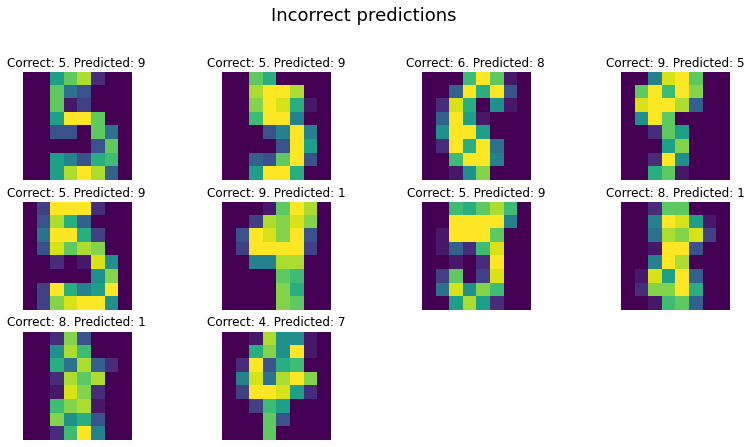

In [40]:
lets_knn(X_train, y_train, X_test, y_test, 5, 'uniform', print_wrong_pred=True)

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# checking initial shapes
print("X train initial shape:", X_train.shape[0:])
print("y train initial shape:", y_train.shape[0:])
print("X test initial shape:", X_test.shape[0:])
print("y test initial shape:", y_test.shape[0:])

11501568/11490434 [==============================] - 0s 0us/step
X train initial shape: (60000, 28, 28)
y train initial shape: (60000,)
X test initial shape: (10000, 28, 28)
y test initial shape: (10000,)


In [42]:
# Reducing the size of testing data set, as it's the most time-consuming
X_train = X_train[:60000]
y_train = y_train[:60000]
X_test = X_test[:1000]
y_test = y_test[:1000]

In [43]:
# reshaping
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

# checking shapes
print("X train shape:", X_train.shape[0:])
print("y train shape:", y_train.shape[0:])
print("X test shape:", X_test.shape[0:])
print("y test shape:", y_test.shape[0:])

X train shape: (60000, 784)
y train shape: (60000,)
X test shape: (1000, 784)
y test shape: (1000,)


Accuracy of uniform KNN with 1 neighbors: 96.2 %. Fit in 15.7 s. Prediction in 96.1 s


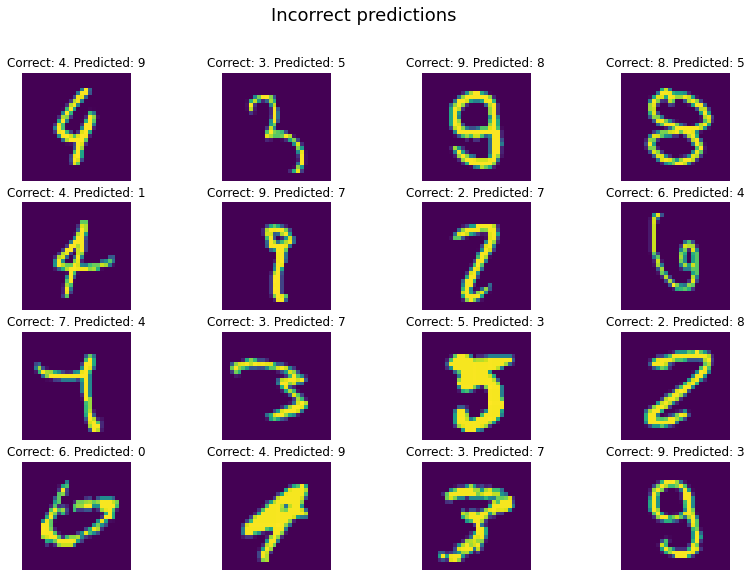

Accuracy of uniform KNN with 2 neighbors: 94.8 %. Fit in 15.5 s. Prediction in 96.2 s


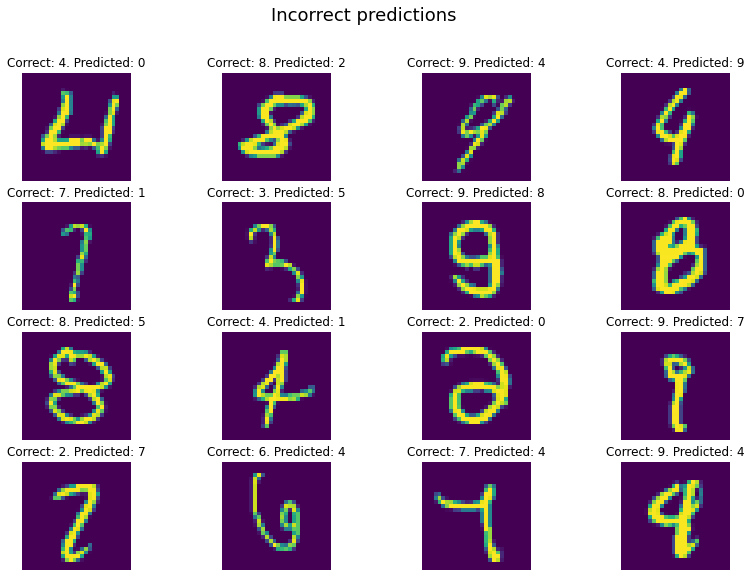

Accuracy of uniform KNN with 3 neighbors: 96.2 %. Fit in 15.2 s. Prediction in 96.0 s


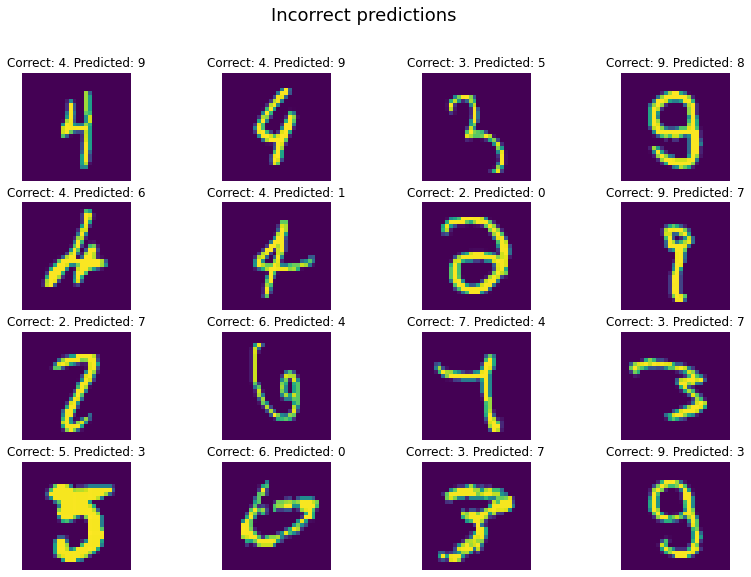

Accuracy of uniform KNN with 4 neighbors: 96.4 %. Fit in 15.3 s. Prediction in 96.1 s


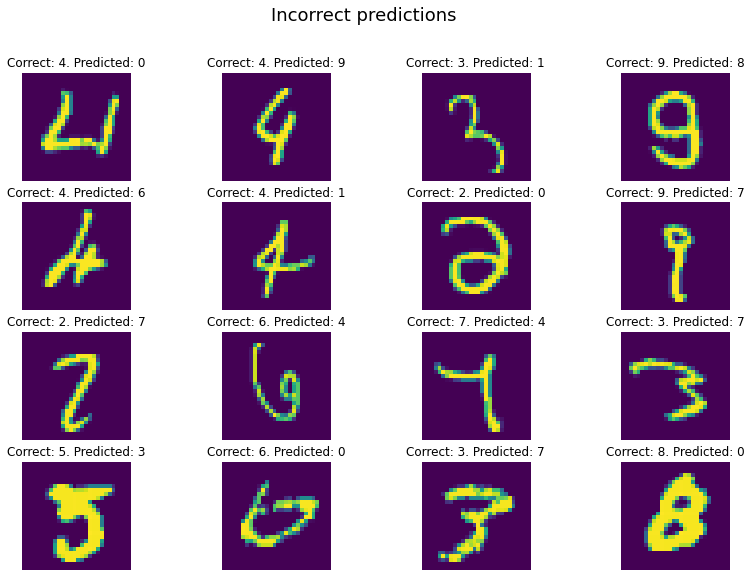

Accuracy of uniform KNN with 5 neighbors: 96.1 %. Fit in 15.3 s. Prediction in 96.0 s


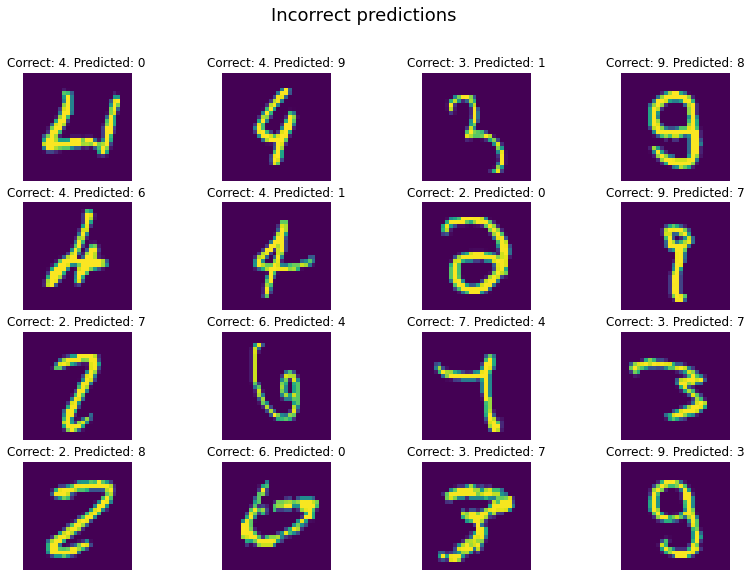

Accuracy of uniform KNN with 6 neighbors: 95.9 %. Fit in 15.3 s. Prediction in 96.0 s


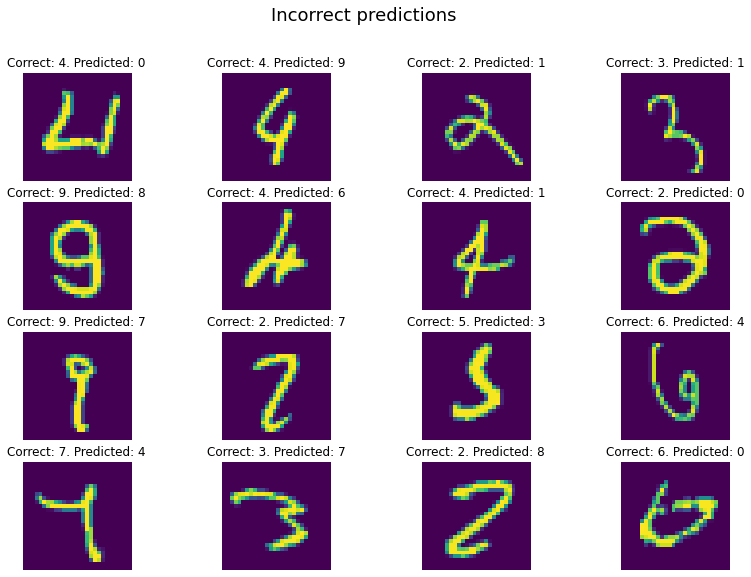

Accuracy of uniform KNN with 7 neighbors: 96.2 %. Fit in 15.3 s. Prediction in 96.3 s


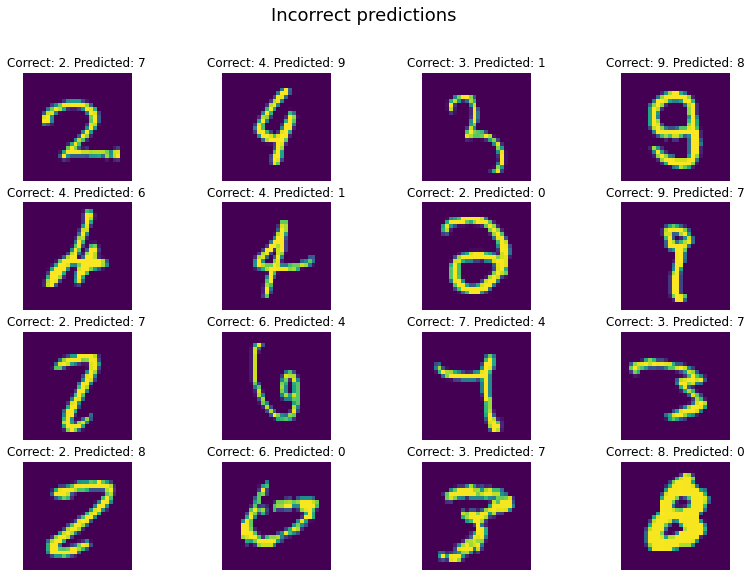

Accuracy of uniform KNN with 8 neighbors: 95.8 %. Fit in 15.5 s. Prediction in 96.5 s


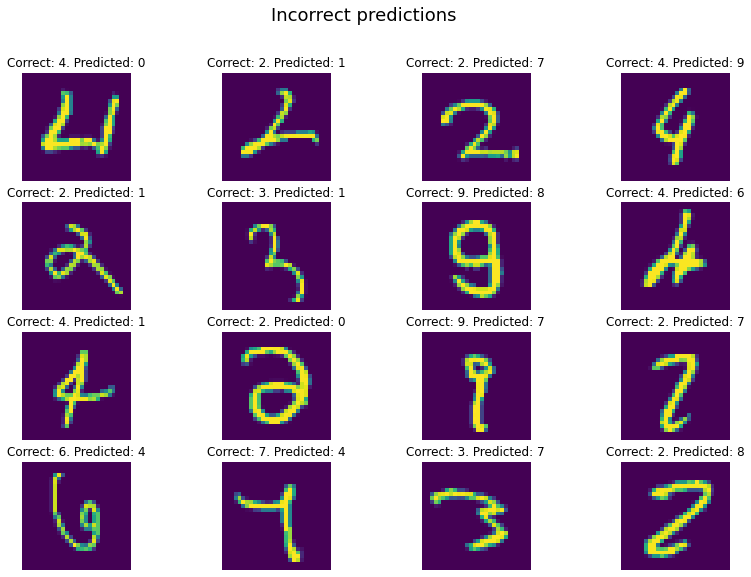

Accuracy of uniform KNN with 9 neighbors: 95.2 %. Fit in 15.2 s. Prediction in 96.1 s


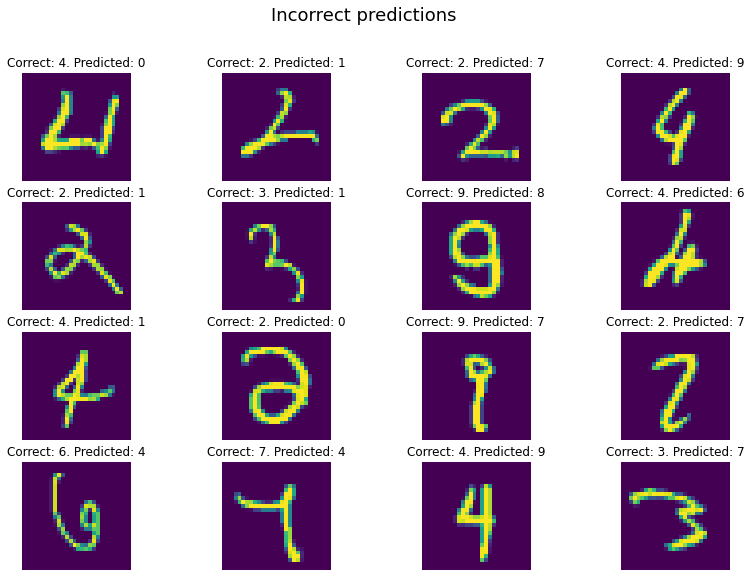

Accuracy of uniform KNN with 10 neighbors: 95.4 %. Fit in 15.4 s. Prediction in 95.9 s


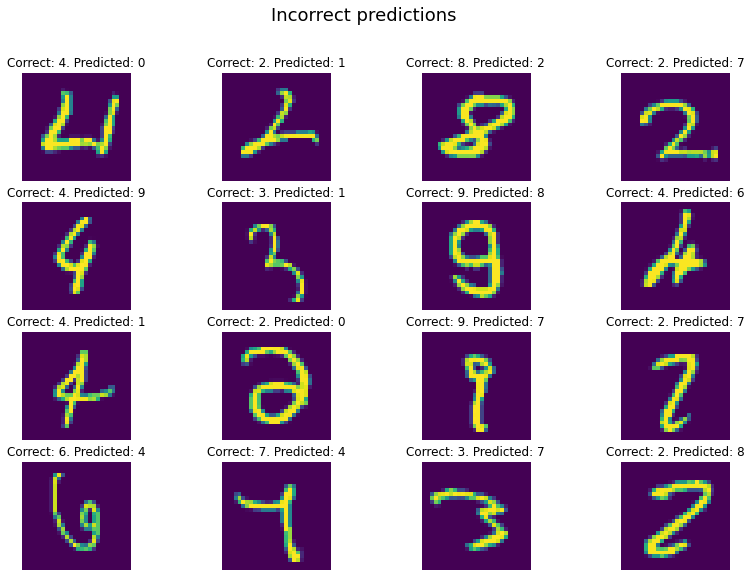

Accuracy of distance KNN with 1 neighbors: 96.2 %. Fit in 14.9 s. Prediction in 96.4 s


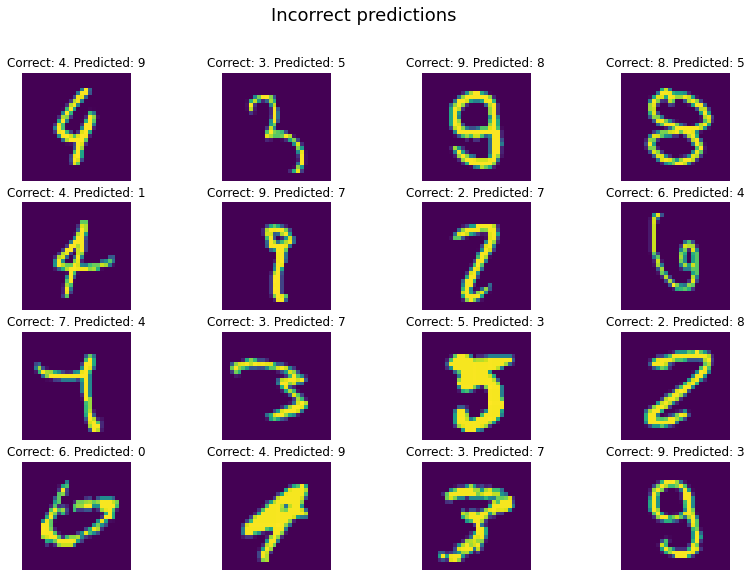

Accuracy of distance KNN with 2 neighbors: 96.2 %. Fit in 15.4 s. Prediction in 97.2 s


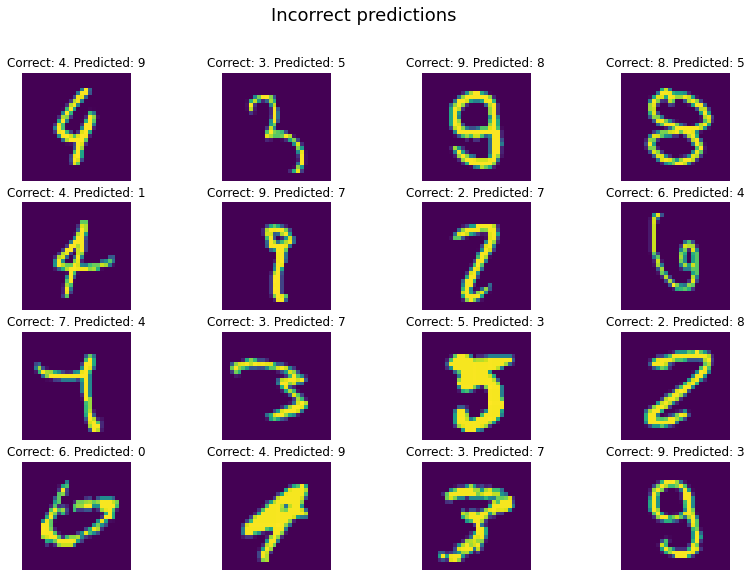

Accuracy of distance KNN with 3 neighbors: 96.5 %. Fit in 15.8 s. Prediction in 97.0 s


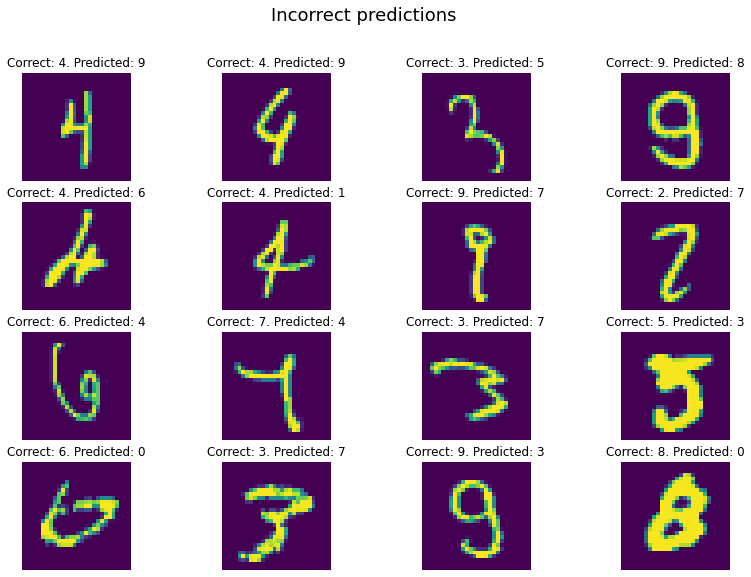

Accuracy of distance KNN with 4 neighbors: 96.4 %. Fit in 15.6 s. Prediction in 96.9 s


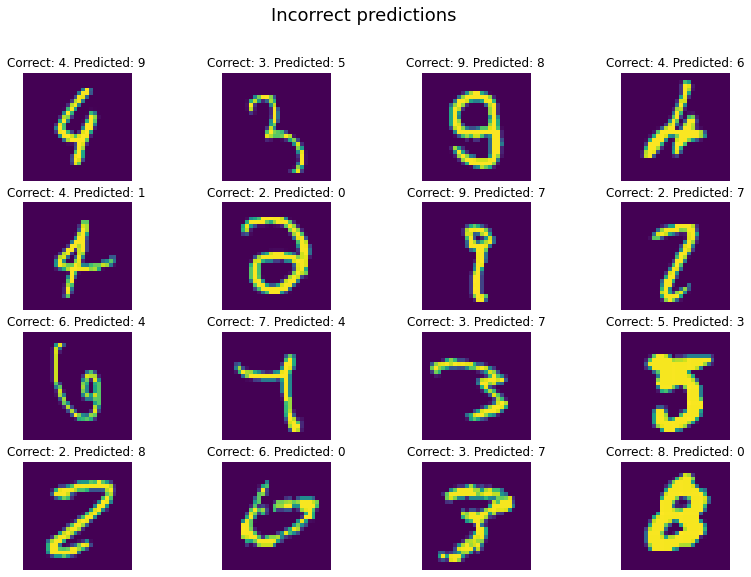

Accuracy of distance KNN with 5 neighbors: 96.4 %. Fit in 15.8 s. Prediction in 97.6 s


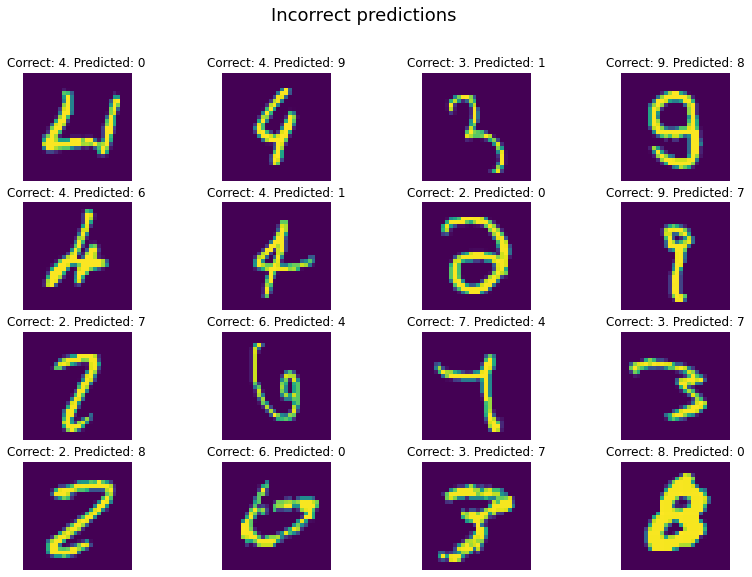

Accuracy of distance KNN with 6 neighbors: 96.5 %. Fit in 15.8 s. Prediction in 96.8 s


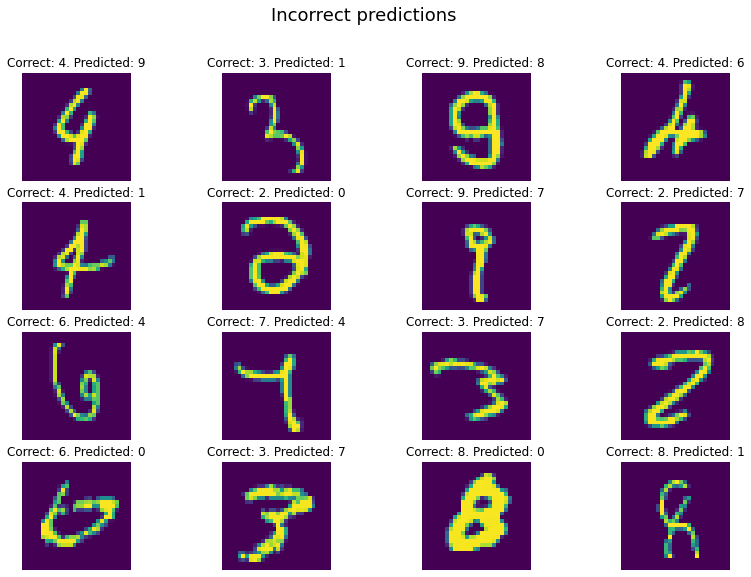

Accuracy of distance KNN with 7 neighbors: 96.4 %. Fit in 15.6 s. Prediction in 97.1 s


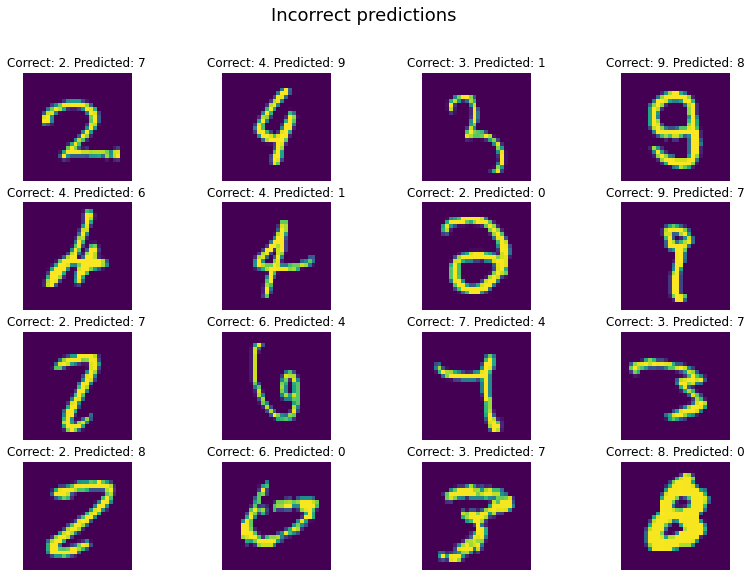

Accuracy of distance KNN with 8 neighbors: 96.4 %. Fit in 15.7 s. Prediction in 97.2 s


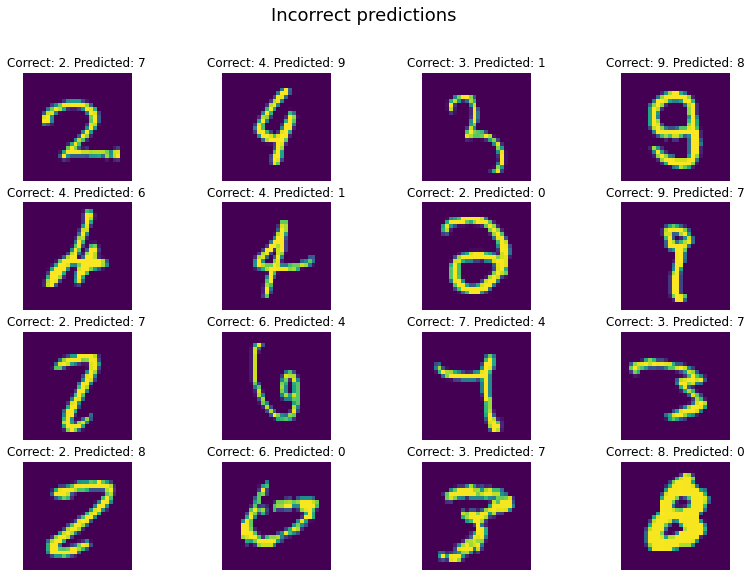

Accuracy of distance KNN with 9 neighbors: 95.7 %. Fit in 15.7 s. Prediction in 96.3 s


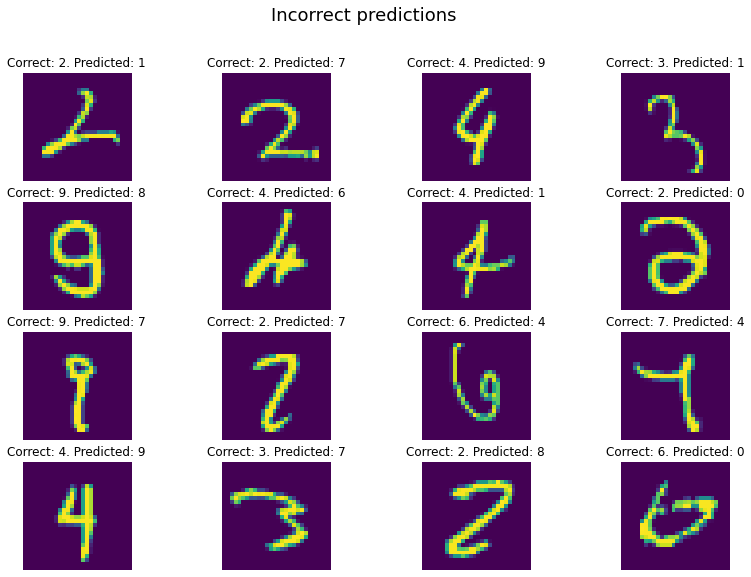

Accuracy of distance KNN with 10 neighbors: 95.7 %. Fit in 15.2 s. Prediction in 96.0 s


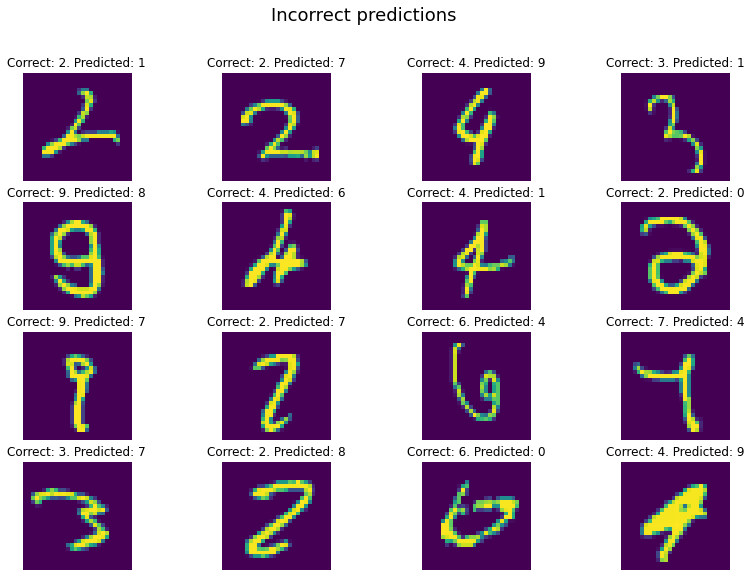

In [44]:
# lets run it with different parameters to check which one is the best
for weights in ['uniform', 'distance']:
  for n in range(1,11):
     lets_knn(X_train, y_train, X_test, y_test, n_neighbors=n, weights=weights, print_wrong_pred=True)